# 1. Contextualização
Este dataset contém informações simuladas relacionadas a defeitos de fabricação observados durante os processos de controle de qualidade. Inclui informações como tipo de defeito, data de detecção, localização dentro do produto, nível de gravidade, método de inspeção utilizado e custos de reparo. Este conjunto de dados pode ser usado para analisar padrões de defeitos, melhorar os processos de controle de qualidade e avaliar o impacto dos defeitos na qualidade do produto e nos custos de produção.

## 1.1. Metas e objetivos
A meta deste projeto é através de uma exploração dos dados identificar tendências nos defeitos e outros insights. 

**Uma pequena observação**: Como o conjunto de dados é simulado, irei utilizar como moeda o Real Brasileiro. 

## 1.2. Estrutura do dataset
|Coluna|Descrição|
|---|---|
|defect_id|Identificador único do defeito|
|product_id|ID do produto associado com o defeito|
|defect_type|Categória do defeito (cósmetico, funcional ou estrutural)|
|defect_description|Descrição do defeito|
|defect_date|Data de quando o defeito ocorreu|
|defect_location|Local onde o defeito foi encontrado (superficie, componente)|
|severity|Severidade do defeito (pequena, moderada, crítica)|
|inspection_method|Método de inspeção (inspeção visual, teste automatizado)|
|repair_action|Ação tomada para o reparo|
|repair_cost|Custo do reparo|

# 2. Preparação do ambiente

## 2.1. Importação das bibliotecas e carregamento dos dados

In [72]:
# Manipulação dos dados
import pandas as pd
import numpy as np
import datetime as dt

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Paired')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [73]:
df = pd.read_csv("../data/raw/defects_data.csv")

## 2.2. Qualidade dos dados

In [74]:
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset possui 1000 linhas e 8 colunas.


In [75]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 5 colunas categóricas.
O dataset possui: 3 colunas numéricas.


In [76]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


## 2.3. Limpeza e manipulação

In [78]:
# Vou realizar a conversão de defect_date para datetime

df.defect_date = pd.to_datetime(df.defect_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   defect_id          1000 non-null   int64         
 1   product_id         1000 non-null   int64         
 2   defect_type        1000 non-null   object        
 3   defect_date        1000 non-null   datetime64[ns]
 4   defect_location    1000 non-null   object        
 5   severity           1000 non-null   object        
 6   inspection_method  1000 non-null   object        
 7   repair_cost        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


In [79]:
# Vou criar uma coluna com o mês do defeito para análises futuras

df['defect_month'] = df['defect_date'].dt.strftime('%Y-%m')
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,defect_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,2024-06
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,2024-04
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,2024-02
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,2024-03
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,2024-04


# 3. Análise Exploratória de Dados

## 3.1. Estatísticas descritivas

In [80]:
df.repair_cost.describe().round(2)

count    1000.00
mean      507.63
std       289.62
min        10.22
25%       270.90
50%       506.43
75%       759.06
max       999.64
Name: repair_cost, dtype: float64

In [81]:
df.product_id.nunique()

100

- ``repair_cost`` é a única variável numérica neste conjunto de dados;
- A média é um pouco maior que a mediana mas a distribuição é próxima da normal;
- Existem 100 produtos únicos.

In [82]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
defect_type,1000,3,Structural,352
defect_location,1000,3,Surface,353
severity,1000,3,Minor,358
inspection_method,1000,3,Manual Testing,352
defect_month,1000,6,2024-01,191


- Os defeitos mais frequentes são estruturais, a localização mais comum é na superfície, e de menor severidade. 
- Janeiro foi o mês com maior ocorrência de defeitos

## 3.2. Aprofundando a análise

### Produtos

In [83]:
product_id = df.groupby("product_id").agg(defect_count = ('product_id', 'count'), total_repair_cost = ('repair_cost', 'sum')).sort_values(by = 'defect_count', ascending = False).reset_index()
product_id

,product_id,defect_count,total_repair_cost
0,63,20,9174.06
1,81,20,11740.64
2,97,19,8405.84
3,56,18,9916.30
4,4,16,6495.45
...,...,...,...
95,89,4,2471.16
96,52,4,1647.65
97,85,4,1337.25
98,19,4,1982.36


In [84]:
# Vou usar o top 10 para as visualizações

viz = product_id.sort_values(by = 'defect_count', ascending=False).head(10).copy()
viz

,product_id,defect_count,total_repair_cost
0,63,20,9174.06
1,81,20,11740.64
2,97,19,8405.84
3,56,18,9916.30
4,4,16,6495.45
5,10,16,10084.92
6,92,16,7588.84
7,6,15,8733.81
8,45,15,9532.36
9,74,15,8460.54


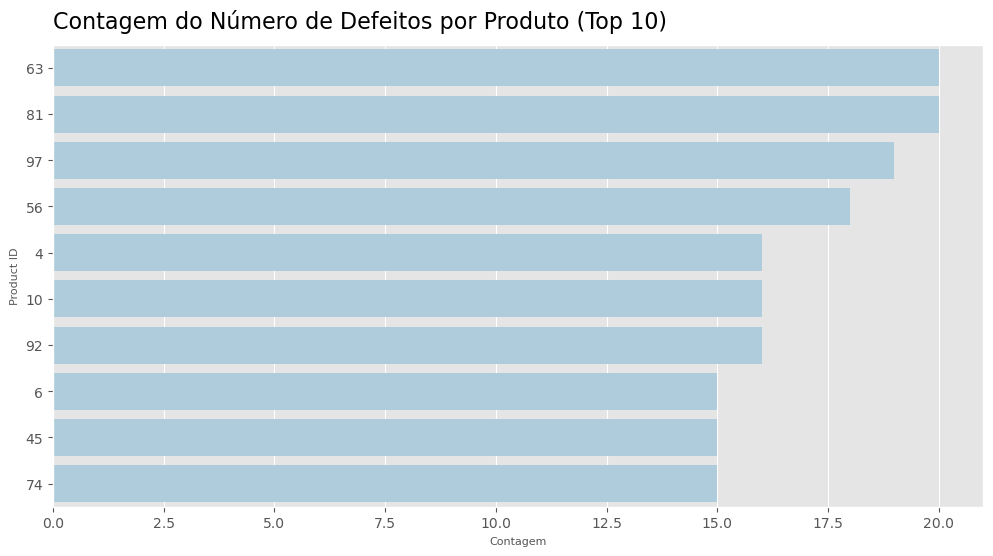

In [85]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(viz, x = 'defect_count', y = 'product_id', orient = 'h', ax = ax, order = viz['product_id'])
ax.set_title("Contagem do Número de Defeitos por Produto (Top 10)", loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel("Contagem", fontsize = 8)
ax.set_ylabel("Product ID", fontsize = 8)
plt.show()

In [86]:
print(f"Quantidade média de defeitos: {product_id['defect_count'].mean()}")
print(f"Desvio padrão da quantidade de defeitos: {product_id['defect_count'].std()}")
print(f"Mediana da quantidade de defeitos: {product_id['defect_count'].median()}")

Quantidade média de defeitos: 10.0
Desvio padrão da quantidade de defeitos: 3.60134654951408
Mediana da quantidade de defeitos: 10.0


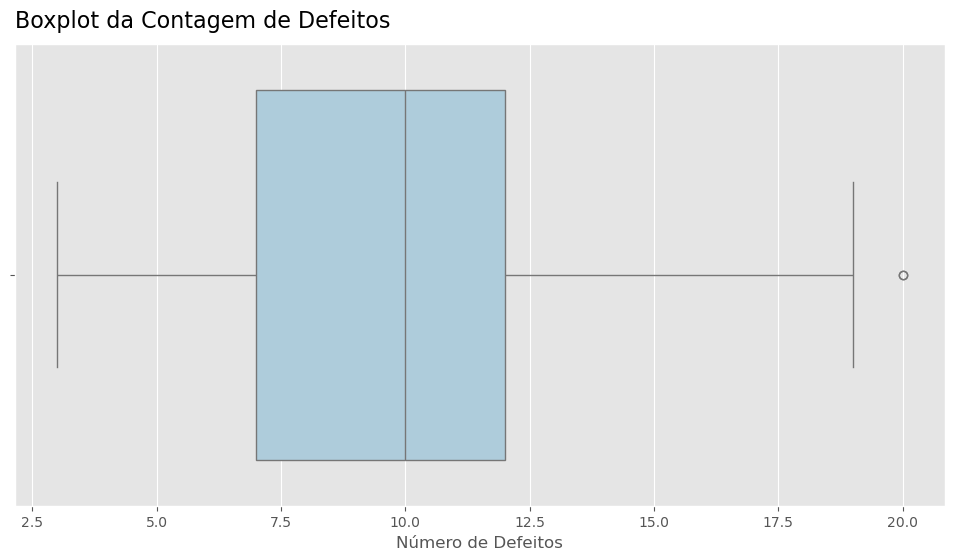

In [87]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.boxplot(x = product_id['defect_count'], orient = 'h')
ax.set_title("Boxplot da Contagem de Defeitos", loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel("Número de Defeitos")
plt.show()

- Produtos com uma alta quantidade de defeitos como os 63 e 81 precisam ter seu processo produtivo investigado e melhorado com urgência, a frequência de defeitos pode ser considerada extrema;
- Estes produtos tem em média duas vezes mais defeitos que o padrão; 
- Os outros produtos no top 10 também necessitam uma investigação para melhora dos processos.

Vamos prosseguir para os custos

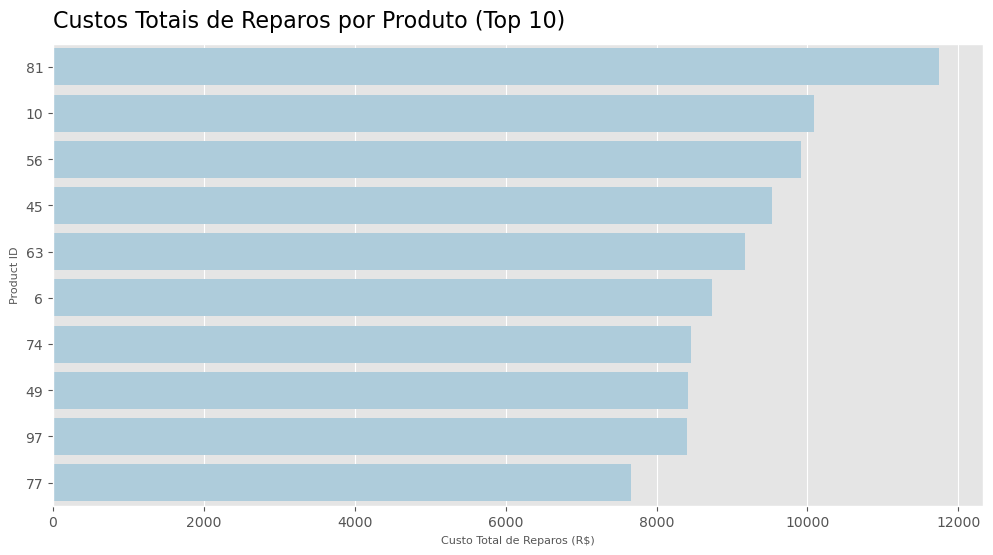

In [88]:
viz = product_id.sort_values(by = 'total_repair_cost', ascending=False).head(10).copy()


fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(viz, y = 'product_id', x = 'total_repair_cost', orient = 'h', ax = ax, order = viz.product_id)
ax.set_title("Custos Totais de Reparos por Produto (Top 10)", loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel("Custo Total de Reparos (R$)", fontsize = 8)
ax.set_ylabel("Product ID", fontsize = 8)
plt.show()

- Junto da alta quantidade de feitos o Produto 81 é aquele que mais causou prejuízos financeiros com reparos (custo médio de R$ 587,03 por reparo);
- Maioria dos produtos que estão nesta lista, estão no ranking de quantidade de defeitos.

### Defeitos por tipo, local e severidade

In [90]:
def_type = df.groupby(['defect_type', 'defect_location', 'severity']).agg(defect_count = ('defect_id', 'count'), total_repair_cost = ('repair_cost', 'sum')).reset_index()
def_type

,defect_type,defect_location,severity,defect_count,total_repair_cost
0,Cosmetic,Component,Critical,34,17182.09
1,Cosmetic,Component,Minor,35,22658.33
2,Cosmetic,Component,Moderate,28,16576.50
3,Cosmetic,Internal,Critical,35,14568.13
4,Cosmetic,Internal,Minor,32,15787.32
...,...,...,...,...,...
22,Structural,Internal,Minor,44,25146.07
23,Structural,Internal,Moderate,30,12958.35
24,Structural,Surface,Critical,46,21754.09
25,Structural,Surface,Minor,51,25935.06


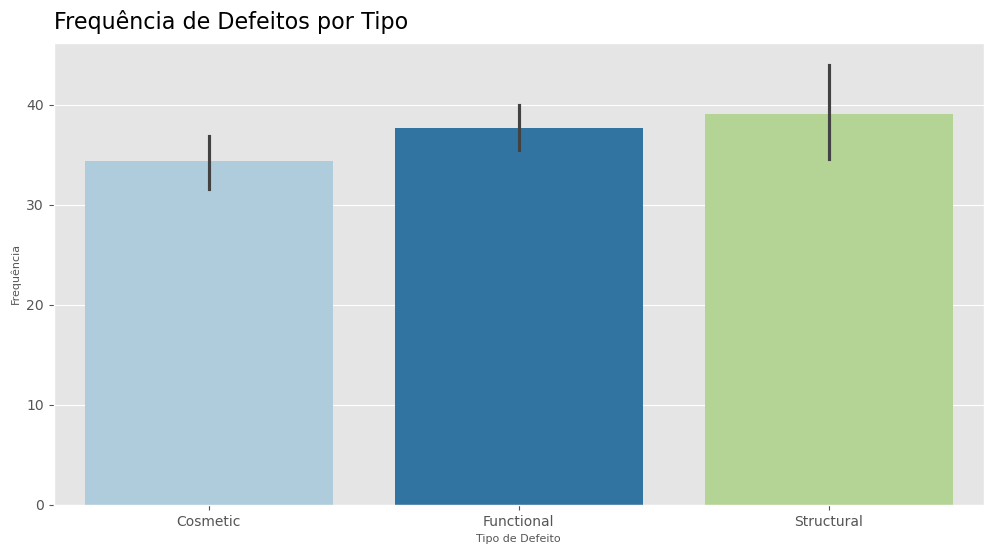

In [91]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(def_type, x = 'defect_type', y = 'defect_count', hue = 'defect_type')
ax.set_title("Frequência de Defeitos por Tipo", loc = 'left',fontsize = 16, pad = 10)
ax.set_xlabel("Tipo de Defeito", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.show()

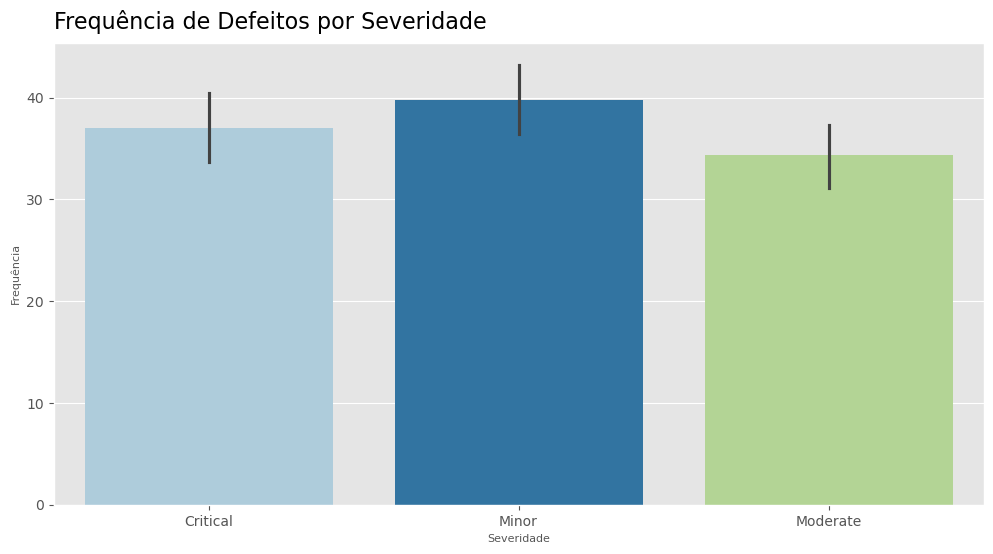

In [92]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(def_type, x = 'severity', y = 'defect_count', hue = 'severity')
ax.set_title("Frequência de Defeitos por Severidade", loc = 'left',fontsize = 16, pad = 10)
ax.set_xlabel("Severidade", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.show()

- Defeitos estruturais são os mais frequentes;
- Defeitos de menor severididade são os mais comuns, mas seguidos dos críticos (maior severidade);
- É necessário buscar as razões dentro do processos produtivo da quantidade de defeitos estruturais.

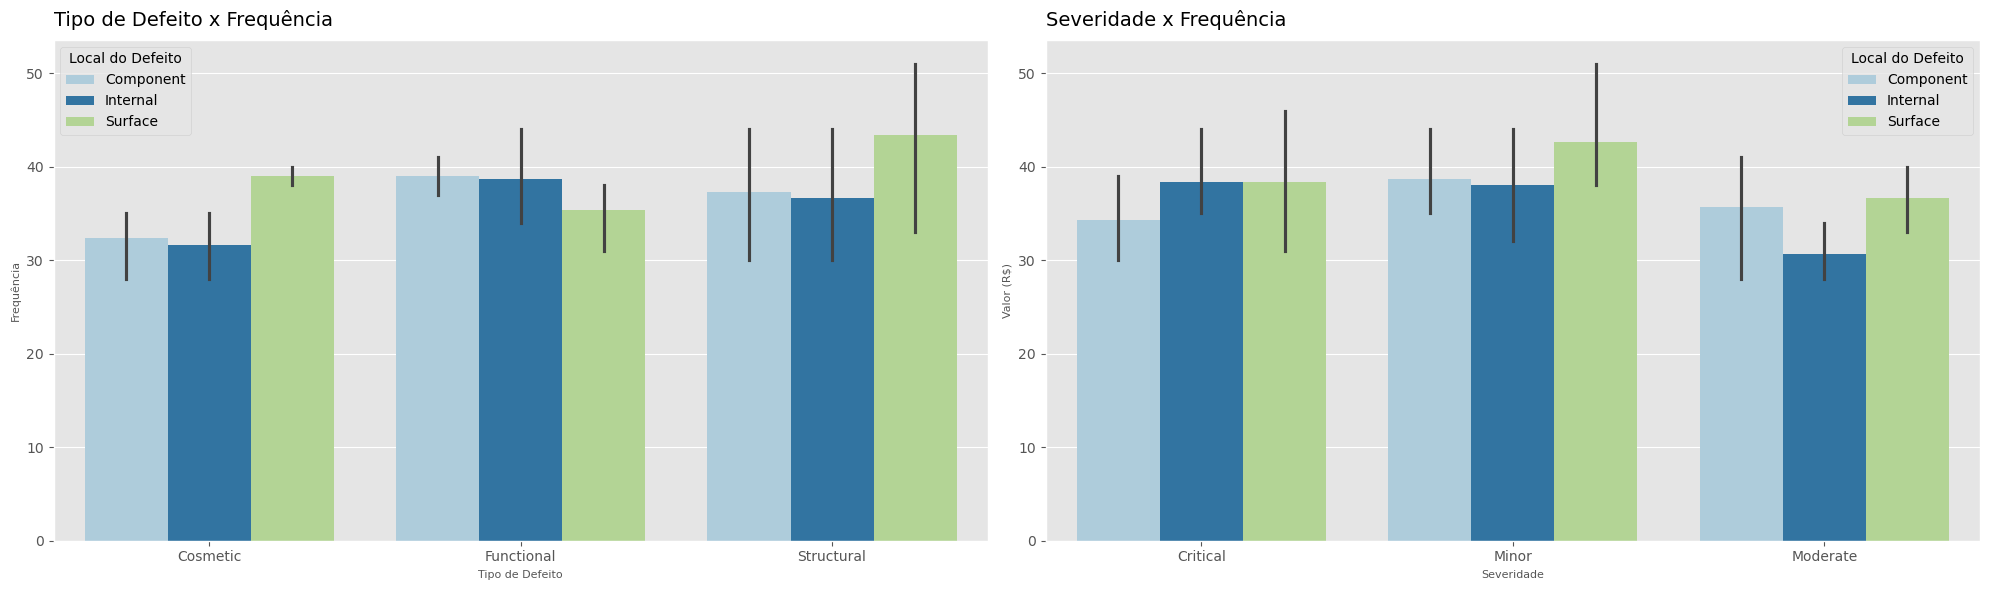

In [93]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6))

sns.barplot(def_type, x = 'defect_type', y = 'defect_count', hue = 'defect_location', ax = axes[0])
axes[0].set_title("Tipo de Defeito x Frequência", loc = 'left', fontsize = 14, pad = 10)
axes[0].set_xlabel("Tipo de Defeito", fontsize = 8)
axes[0].set_ylabel("Frequência", fontsize = 8)
axes[0].legend(title = 'Local do Defeito')

sns.barplot(def_type, x = 'severity', y = 'defect_count', hue = 'defect_location', ax = axes[1])
axes[1].set_title("Severidade x Frequência", loc = 'left', fontsize = 14, pad = 10)
axes[1].set_xlabel("Severidade", fontsize = 8)
axes[1].set_ylabel("Valor (R$)", fontsize = 8)
axes[1].legend(title = 'Local do Defeito')

plt.tight_layout()
plt.show()

#### Tipo de Defeito

- Os defeitos estrutrais tem sido mais frequentes na superfície dos Produtos, a superfície também é onde os defeitos cosméticos também são maioria;
- Existe uma alta quantidade de defeitos funcionais e estruturais na parte interna dos Produtos;
- Defeitos funcionais tem uma alta frequência quando comparados aos outros, apesar da menor quantidade de defeitos na superfície. 

#### Severidade

- Defeitos de menor severidade são os de maior frequência, eles se repetem em quantidade mais elevada na superfície;
- Os defeitos críticos tem volume maior nas partes internas e de superífcie dos Produtos;
- Defeitos moderados tem menor frequência.

O processo de fabricação dos produtos precisa uma atenção especial nas parte superficiais, componentes internos também necessitam de uma melhor inspeção. 

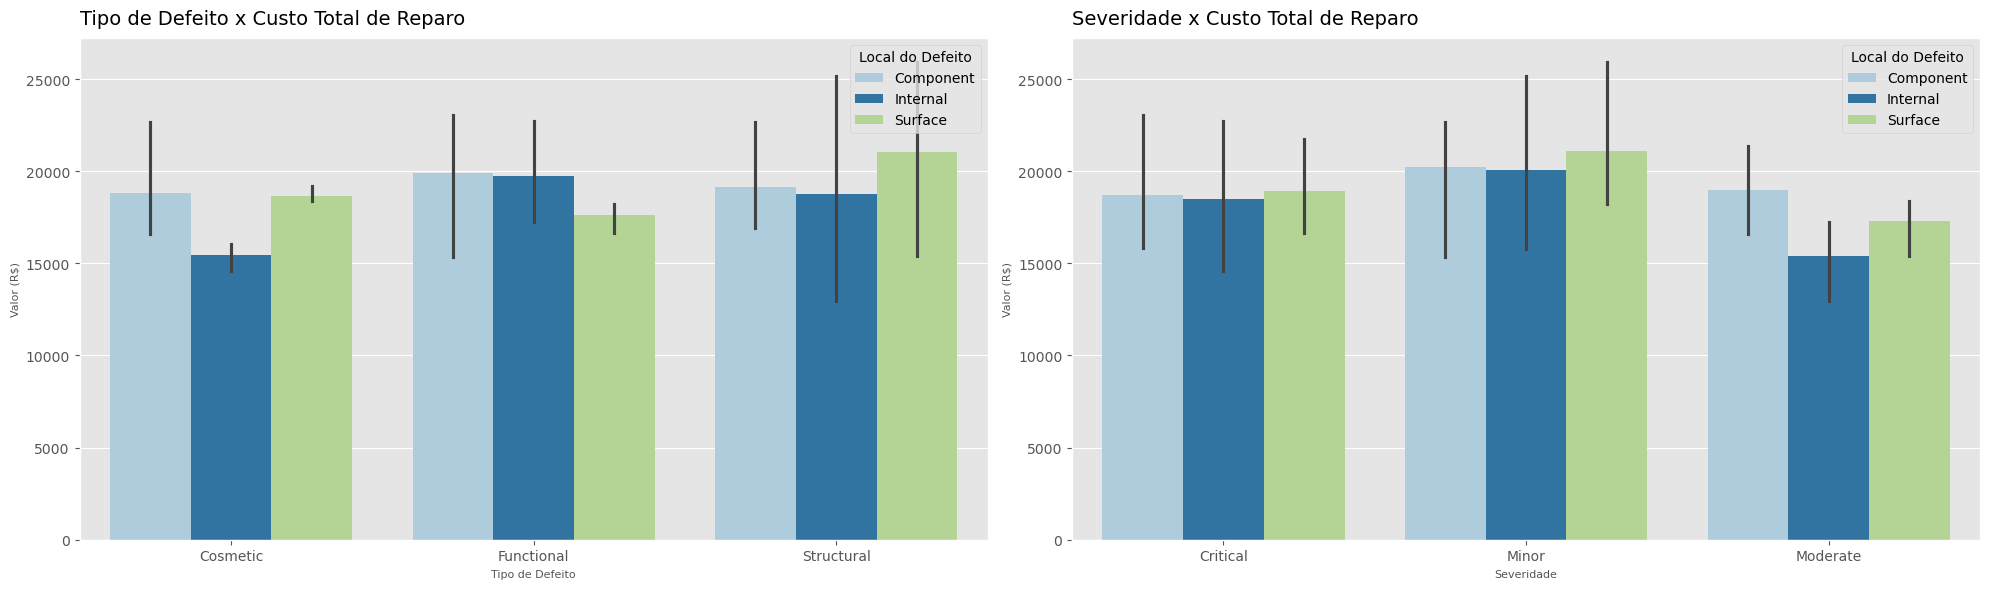

In [94]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6))

sns.barplot(def_type, x = 'defect_type', y = 'total_repair_cost', hue = 'defect_location', ax = axes[0])
axes[0].set_title("Tipo de Defeito x Custo Total de Reparo", loc = 'left', fontsize = 14, pad = 10)
axes[0].set_xlabel("Tipo de Defeito", fontsize = 8)
axes[0].set_ylabel("Valor (R$)", fontsize = 8)
axes[0].legend(title = 'Local do Defeito')

sns.barplot(def_type, x = 'severity', y = 'total_repair_cost', hue = 'defect_location', ax = axes[1])
axes[1].set_title("Severidade x Custo Total de Reparo", loc = 'left', fontsize = 14, pad = 10)
axes[1].set_xlabel("Severidade", fontsize = 8)
axes[1].set_ylabel("Valor (R$)", fontsize = 8)
axes[1].legend(title = 'Local do Defeito')

plt.tight_layout()
plt.show()

#### Tipo de Defeito

- Os defeitos estruturais na superfície sãos o que causam maior prejuízo financeiro; 
- Defeitos funcionais internos e nos componentes estão praticamente empatados na segunda colação de maiores custos;

#### Severidade

- Por seu alto volume, defeitos de menor severidade são os que causam maiores prejuízos, novamente a superfície é uma área em que se deve ter alerta;
- Danos moderados aos componentes também mostram alto custo de reparo.

### Frequência dos defeitos e o período analisado

In [95]:
def_month = df.groupby(['defect_month', 'defect_type', 'severity']).agg(defect_count = ('defect_id', 'count'), total_repair_cost = ('repair_cost', 'sum')).reset_index()
def_month.head()

,defect_month,defect_type,severity,defect_count,total_repair_cost
0,2024-01,Cosmetic,Critical,29,12739.81
1,2024-01,Cosmetic,Minor,17,10575.63
2,2024-01,Cosmetic,Moderate,19,10192.08
3,2024-01,Functional,Critical,22,11628.93
4,2024-01,Functional,Minor,17,8137.94


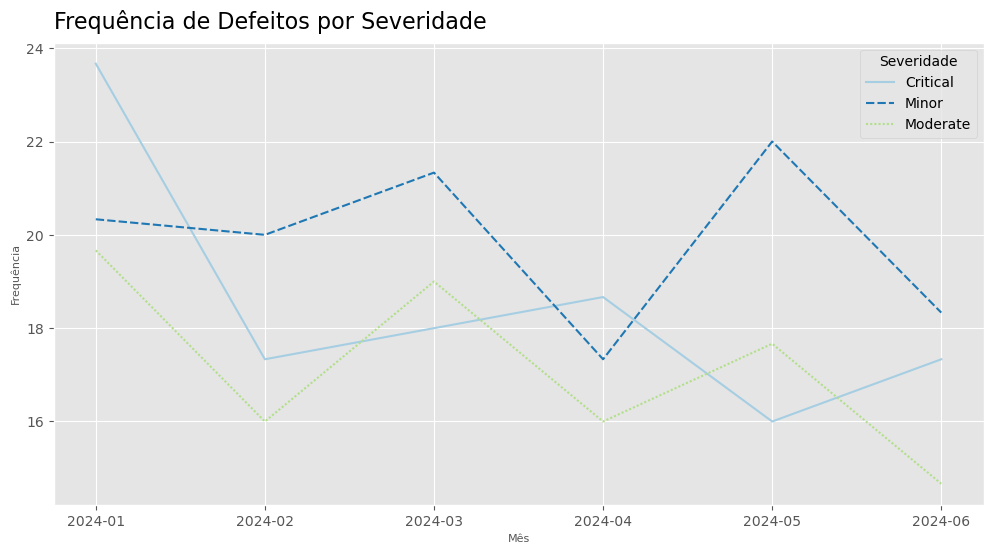

In [96]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(def_month, x = 'defect_month', y = 'defect_count', hue = 'severity', style = 'severity', ci = None)
ax.set_title("Frequência de Defeitos por Severidade", fontsize = 16, pad = 10, loc = 'left')
ax.set_xlabel("Mês", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.legend(title = "Severidade")
plt.show()

- Apesar da grande queda na frequência, existe tendência de aumento na quantidade de defeitos críticos;
- Em maio de 2024 houve um grande aumento no número de defeitos moderados e críticos;
- Existe um ciclo de aumento e diminuição na frequência de defeitos, deve ser investigado o que está por trás dos picos de aumento após uma melhora;

Investigar o que levou ao aumento de defeitos de severidade crítica entre maio e junho pode levar a soluções para evitar que o mesmo aconteça os defeitos menos severos e moderados.

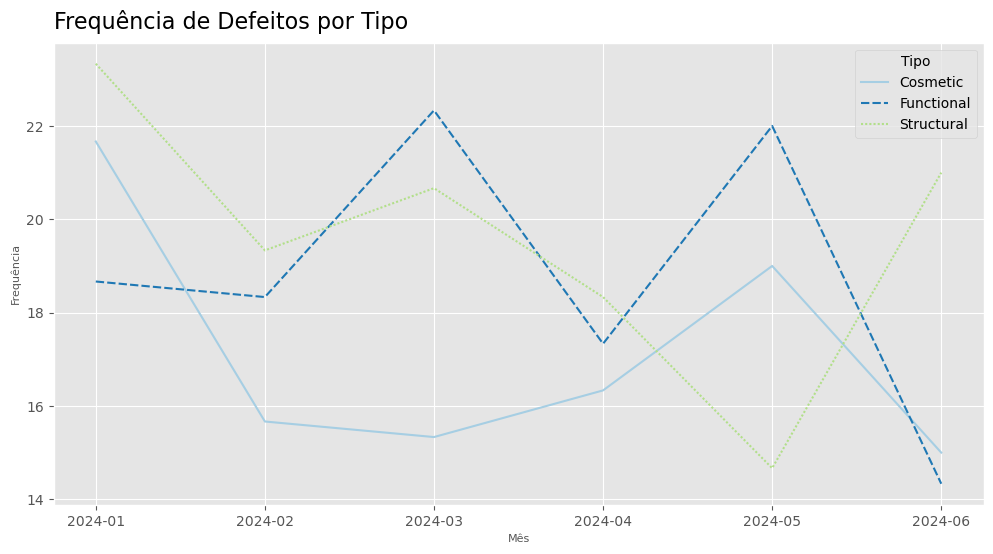

In [97]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(def_month, x = 'defect_month', y = 'defect_count', hue = 'defect_type', style = 'defect_type', ci = None)
ax.set_title("Frequência de Defeitos por Tipo", fontsize = 16, pad = 10, loc = 'left')
ax.set_xlabel("Mês", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.legend(title = "Tipo")
plt.show()

- O ciclo de melhora/piora é mais acentuado quando olhamos por tipo;
- Assim como quando observamos em relação a severidade, buscar no processo produtivo o que está causando o aumento dos defeitos estrurais pode dar uma direção para evitar que o ciclo se repita em defeitos cósmeticos e funcionais. 

## 3.4. Conclusões da Análise Exploratória

#### Sobre os produtos

- Os Produtos 63, 81, 97, 56,  4, 10, 92,  6, 45, 74 são os que apresentam maior quantidade de defeitos;
- 63 e 81 apresentam valores extremos na frequência de defeitos;
- O Produto 81 além de ser o que mais frequentemente apresenta defeitos, é o que causou mais prejuízos com reparos.

#### Sobre os defeitos

- Defeitos estruturais são os mais frequentes e apresentam tendência de aumento na frequência, equanto os oturos estão em baixa;
- Defeitos de severidade crítica estão com uma tendência de aumento em frequência, o restante apresenta tendência de baixa;
- Existe um ciclo de melhora/piora em relação a frequência de defeitos que deve ser investigado; 
- A superífcie é o local de mais frequente ocorrência de defeitos, com destaque para defeitos estrurais;
- Os defeitos de menor severidade são os mais frequentes.

#### Insights

Vejo a necessidade de realizar um mapeamento do processo de produção e aplicar ferramentas como o DMAIC do Six Sigma, para buscar a causa raíz das falhas estrurais na produção dos componentes de Superfície dos produtos. Um caminho apontado pela análise é começar pela investigação do que vem causando os ciclos de aumento e queda do número de defeitos nos Produtos com foco (1) em defeitos de severidade crítica, (2) defeitos do tipo estrurais que estão em tendência de crescimento, antes que os outros aspectos também aumentem a frequência de defeitos, e (3) nos defeitos na superfície dos produtos. 